Importing Libraries

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.svm import SVC

import pickle

In [3]:
data = pd.read_csv(r'winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

C:\Users\bhatt\AppData\Local\Temp\ipykernel_33824\1289758398.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['alcohol'],color='r')


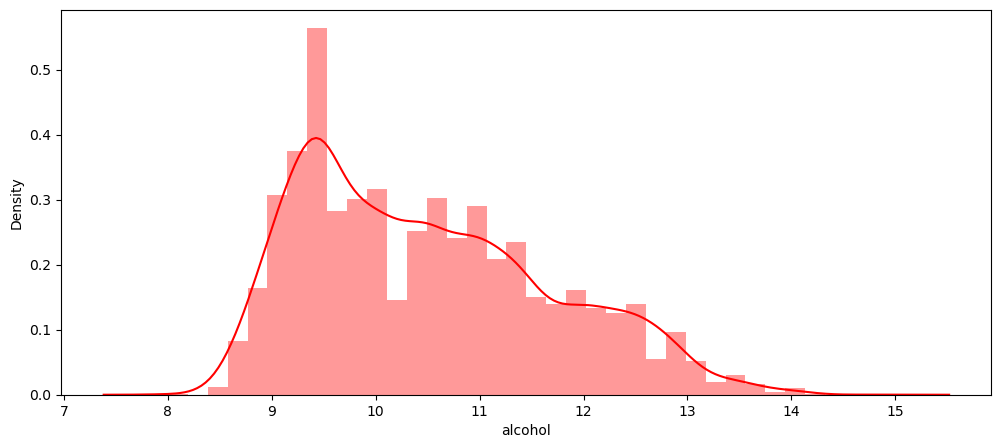

In [5]:
# Checking the distribution (normal or skewed)

plt.figure(figsize=(12,5))
sns.distplot(data['alcohol'],color='r')
plt.show()

In [14]:
# Creating a data frame with categorical features for following visualization
df_cat = data.select_dtypes (include='object')
df_cat.head()

,type
0,white
1,white
2,white
3,white
4,white


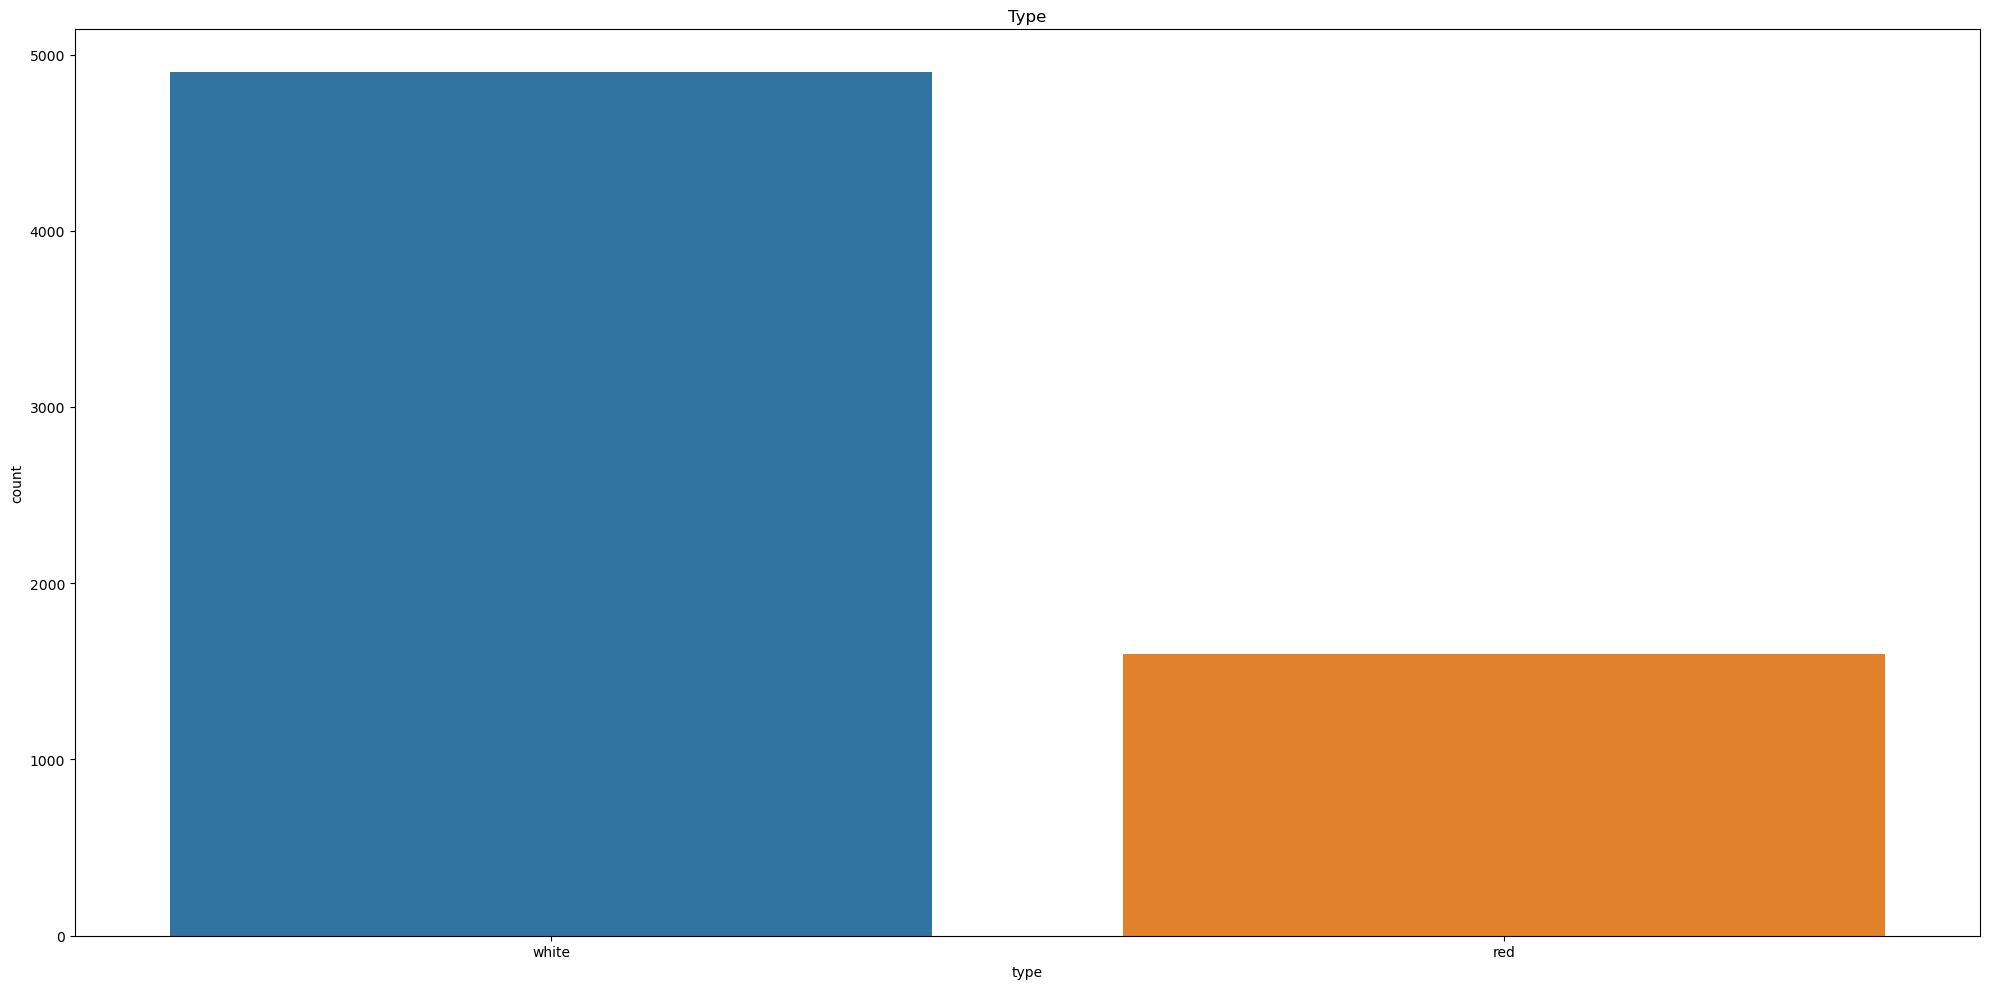

In [20]:
ig, ax = plt.subplots(figsize=(20, 10))

# Create a countplot for the 'type' column
sns.countplot(data=df_cat, x='type', ax=ax)
ax.set_title('Type')

# Adjust layout
plt.tight_layout()
plt.show()

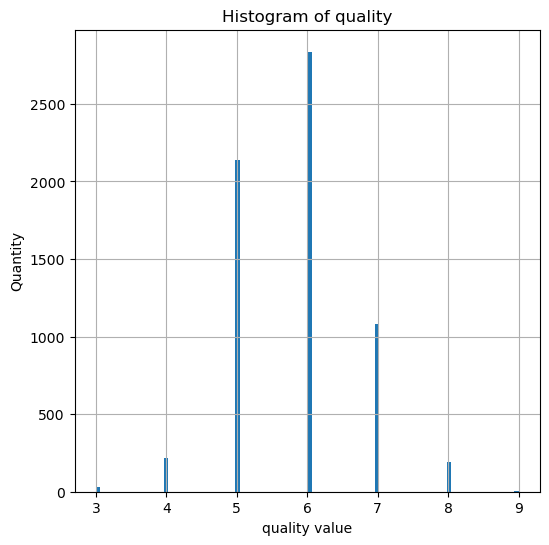

In [22]:
axarr = data.hist(column=['quality'], bins=100, figsize=(6, 6))
ax = axarr.flatten()[0]
ax.set_xlabel(f"{ax.get_title()} value")
ax.set_ylabel("Quantity")
title = ax.get_title()
ax.set_title(f"Histogram of {title}")
plt.show()

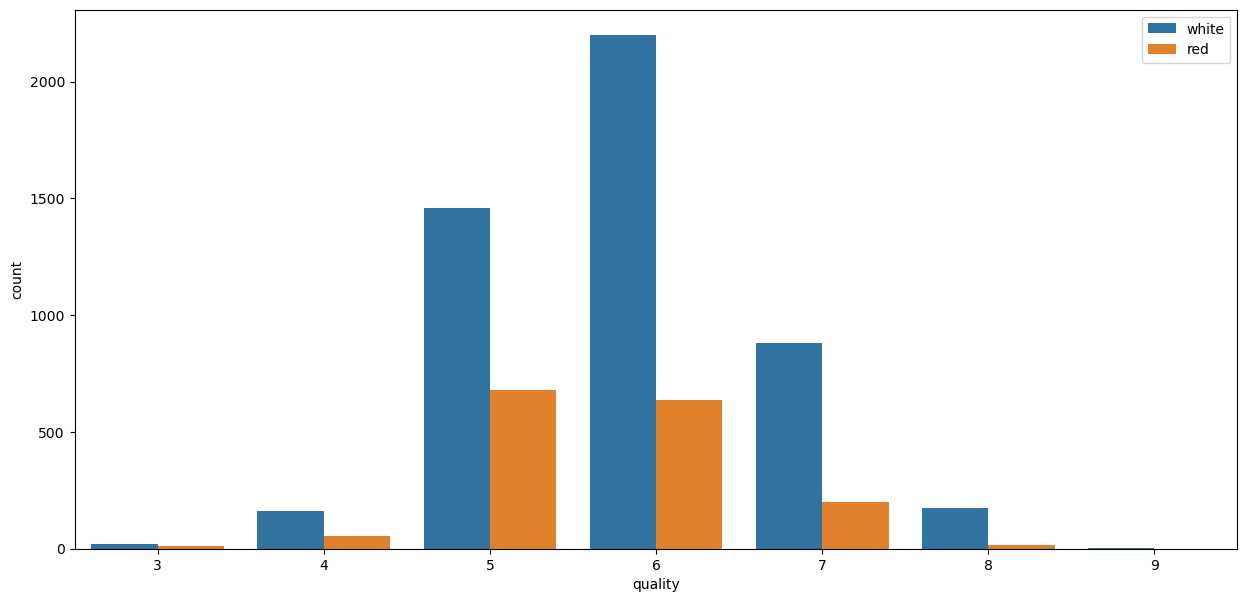

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(data=data,x='quality',hue=data['type'])
plt.legend(loc='upper right')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


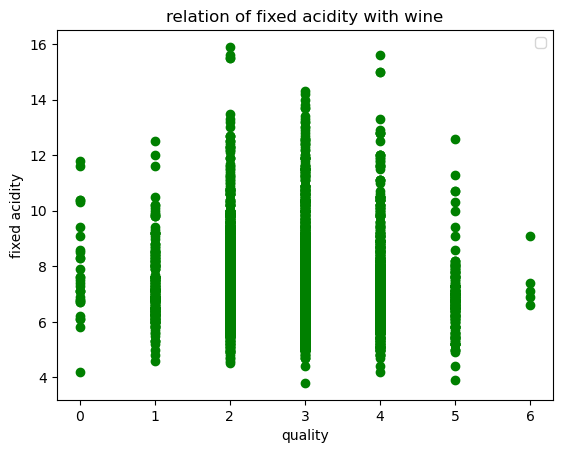

In [28]:
plt.scatter(data['quality'], data['fixed acidity'], color = 'green') 
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


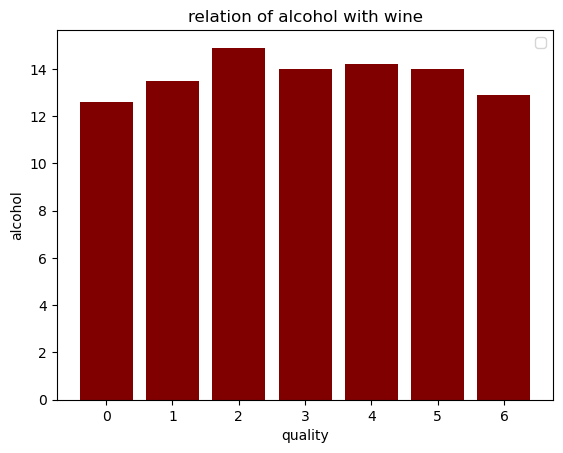

In [30]:
plt.bar(data['quality'], data['alcohol'], color = 'maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

<Axes: xlabel='quality', ylabel='citric acid'>

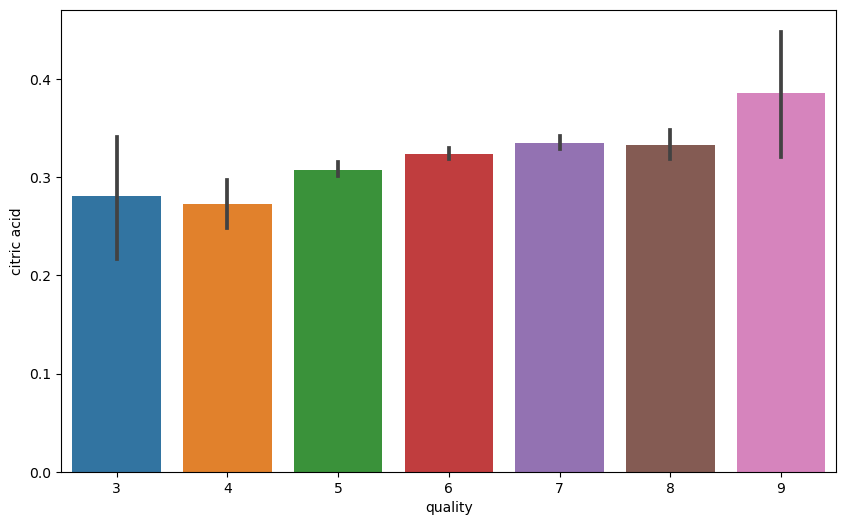

In [27]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y ='citric acid',data= data)

<Axes: xlabel='quality', ylabel='residual sugar'>

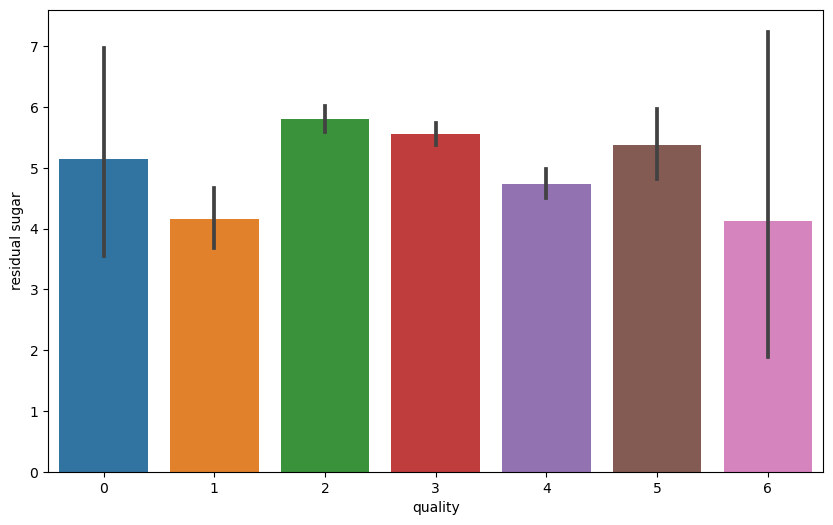

In [32]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y = 'residual sugar',data= data)

<Axes: xlabel='quality', ylabel='chlorides'>

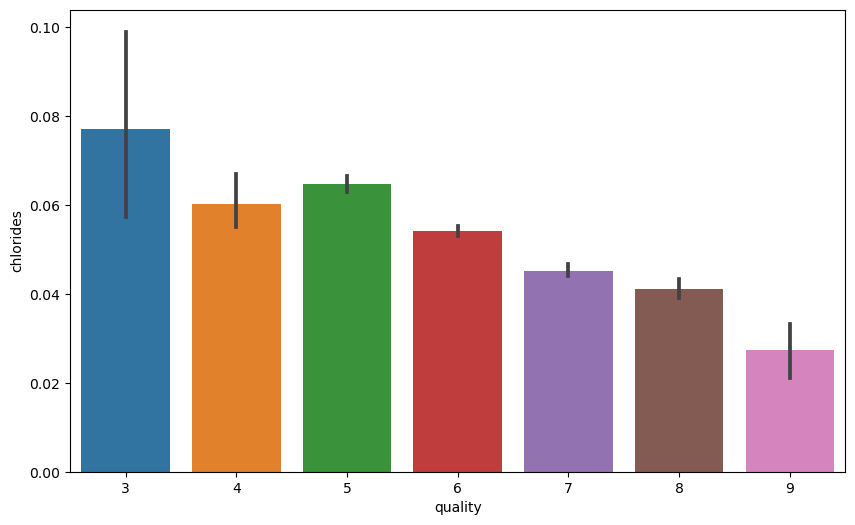

In [29]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x= 'quality', y = 'chlorides', data = data)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

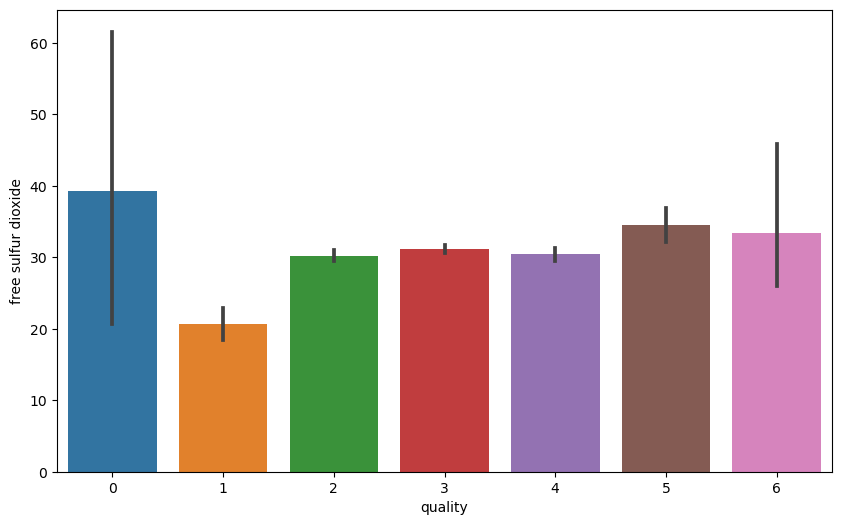

In [33]:
fig = plt.figure(figsize = (10,6))

sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data)

<Axes: xlabel='quality', ylabel='sulphates'>

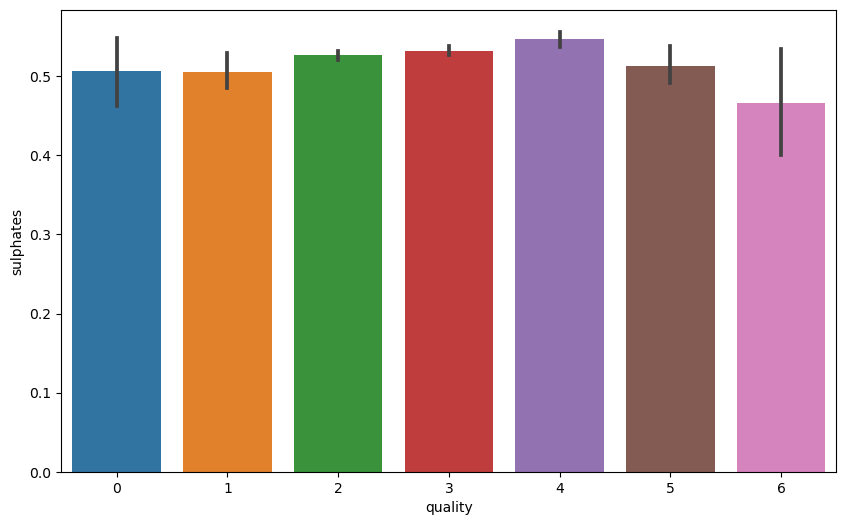

In [34]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x= 'quality', y ='sulphates',data= data)

C:\Users\bhatt\AppData\Local\Temp\ipykernel_33824\641161833.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<Axes: >

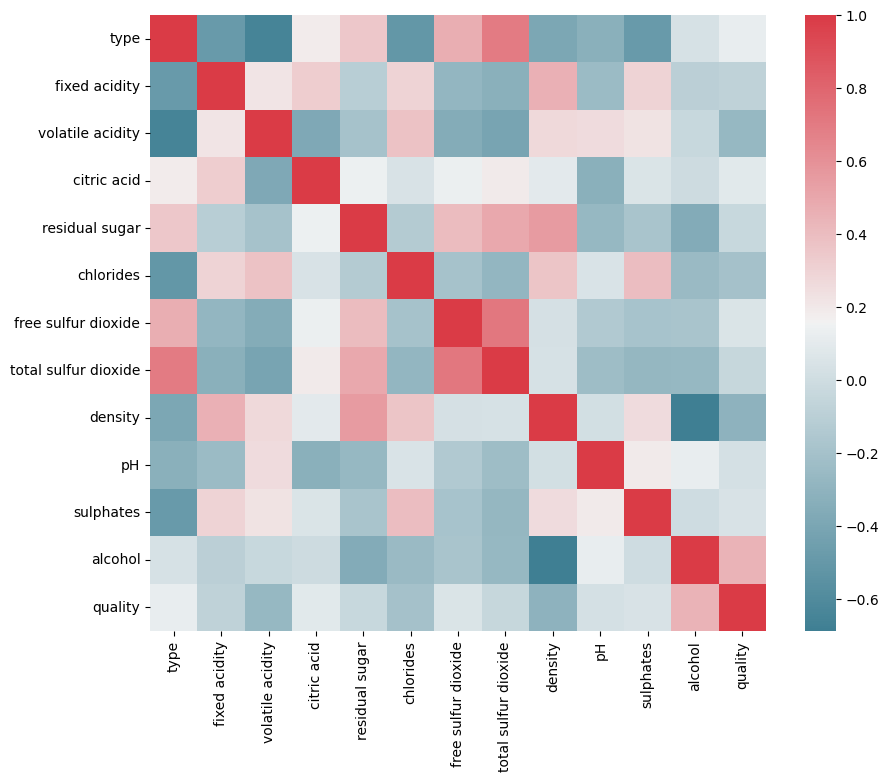

In [35]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

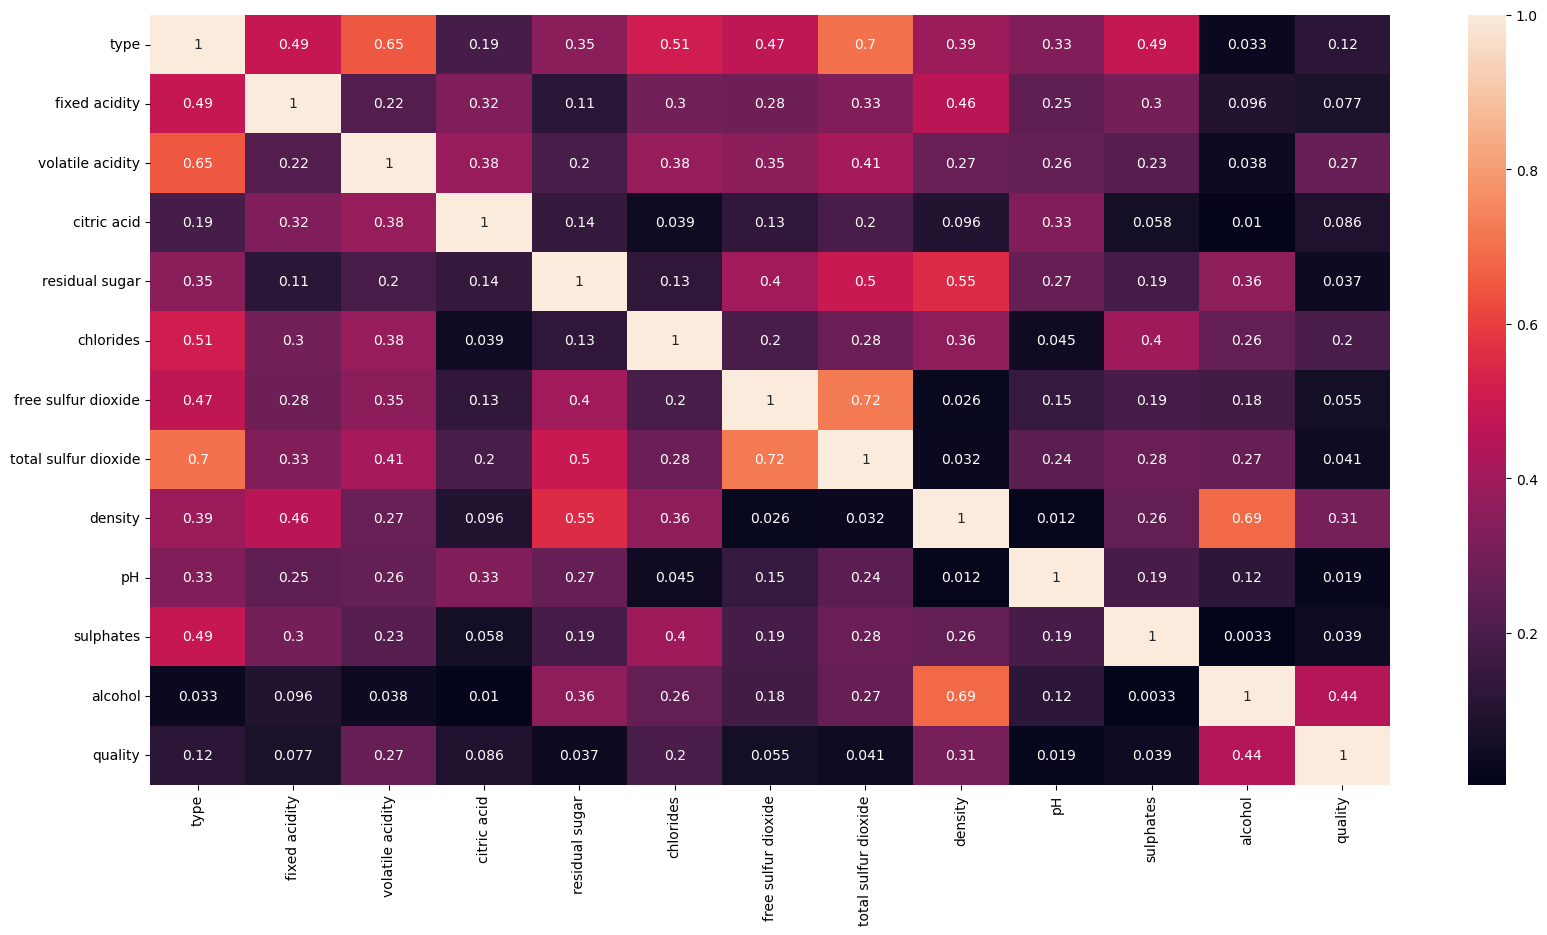

In [36]:
plt.figure(figsize = (20, 10))
sns.heatmap(data.corr().abs(), annot = True)
plt.show()

In [37]:
data.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,0.753886,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,2.818378
std,0.430779,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,2.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,3.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,3.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,6.000000


In [38]:
data = data.drop(['volatile acidity', 'total sulfur dioxide', 'chlorides', 'density'], axis = 1)
# checking the shape of the dataset
print(data.shape)

(6497, 9)


In [39]:
# converting the response variables (3-7) as binary response variables that is either good or bad
data['quality'] = data['quality'].map({3: 'bad', 4 :'bad', 5: 'bad',6: 'good', 7: 'good', 8: 'good'})
# analyzing the different values present in the dependent variable(quality column)
data['quality'].value_counts()

bad     4108
good       5
Name: quality, dtype: int64

In [40]:
data.isnull().any()

type                   False
fixed acidity           True
citric acid             True
residual sugar          True
free sulfur dioxide    False
pH                      True
sulphates               True
alcohol                False
quality                 True
dtype: bool

In [41]:
data.isnull().sum()

type                      0
fixed acidity            10
citric acid               3
residual sugar            2
free sulfur dioxide       0
pH                        9
sulphates                 4
alcohol                   0
quality                2384
dtype: int64

In [42]:
data["fixed acidity"].fillna(data["fixed acidity"].mean(), inplace = True) 
data["sulphates"].fillna(data["sulphates"].mean(), inplace=True)
data["pH"].fillna(data["pH"].mean(),inplace = True)
data["residual sugar"].fillna(data["residual sugar"].mean(), inplace = True) 
data["citric acid"].fillna(data["citric acid"].mean(), inplace=True) 
data["quality"].fillna(data["quality"].mode()[0], inplace=True)

In [53]:
#converting categorical data to numerical data 
le = LabelEncoder() 
data['quality'] = le.fit_transform(data['quality'])
data['type'] = le.fit_transform(data['type'])


In [54]:
# dividing the dataset into dependent and independent variables

x = data.iloc[:,:8]

y = data.iloc[:,8:9]

# determining the shape of x and y.

print(x.shape)

print(y.shape)

(6497, 8)
(6497, 1)


In [55]:
# dividing the dataset in training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)
# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4872, 8)
(4872, 1)
(1625, 8)
(1625, 1)


In [103]:
#standard scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
print("Successful")

Successful


In [125]:
def logisticRegression(x_train, x_test, y_train, y_test):
    # creating the model
    model = LogisticRegression()

    #feeding the training set into the model
    model.fit(x_train, y_train)

    # predicting the results for the test set
    ypred = model.predict(x_test)

    #calculating the training and testing accuracies

    print('***logisticRegression***')

    print("Training accuracy :", model.score (x_train, y_train))

    print("Testing accuracy :", model.score(x_test, y_test))

    #classification report

    print(classification_report(y_test, ypred))

    # confusion matrix

    print(confusion_matrix(y_test, ypred))

In [126]:
def SGD(x_train, x_test, y_train, y_test):
    #creating the model
    model = SGDClassifier (penalty=None)

    # feeding the training model into the model
    model.fit(x_train, y_train)

    # predicting the values for the test set
    ypred = model.predict(x_test)
    print('***Stochastic Gradient Descent Classifier***')
    print("Training accuracy :", model.score (x_train, y_train))
    print("Testing accuracy :", model.score (x_test, y_test))

    #classification report
    print(classification_report(y_test, ypred))

    # confusion matrix
    print(confusion_matrix(y_test, ypred))

In [127]:
def SVClassifier(x_train, x_test, y_train, y_test):
    # creating the model
    model = SVC()

    #feeding the training set into the model
    model.fit(x_train, y_train) # predicting the results for the test set
    y_pred = model.predict(x_test)
    
    # calculating the training and testing accuracies

    print('***Support Vector Classifier***')
    print("Training accuracy:", model.score (x_train, y_train)) 
    print("Testing accuracy:", model.score (x_test, y_test))

    # classification report
    print(classification_report (y_test, ypred))

    # confusion matrix
    print(confusion_matrix(y_test, ypred))

In [128]:
def decisionTree(x_train, x_test, y_train, y_test):
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    yPred = dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print("Training accuracy :", dt.score(x_train, y_train))
    print("Testing accuracy :", dt.score (x_test, y_test))
    print('Confusion matrix')
    print(confusion_matrix(y_test,ypred))
    print('Classification report')
    print(classification_report(y_test,ypred))

In [129]:
def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    ypred = rf.predict(x_test) 
    print ('***RandomForestClassifier***')
    print("Training accuracy:", rf.score(x_train, y_train))
    print("Testing accuracy :", rf.score(x_test, y_test))
    print('Confusion matrix')
    print(confusion_matrix(y_test,ypred))
    print('Classification report')
    print(classification_report(y_test,ypred))

In [130]:
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train, y_train)
    yPred = xg.predict(x_test)
    print('***Gradient BoostingClassifier***')
    print("Training accuracy :", xg.score(x_train, y_train))
    print("Testing accuracy :", xg.score (x_test, y_test))
    print('Confusion matrix')
    print(confusion_matrix(y_test,ypred))
    print('Classification report')
    print(classification_report(y_test,ypred))

In [135]:
def compareModel(x_train, x_test, y_train, y_test):
    logisticRegression(x_train, x_test, y_train, y_test)
    print('-'*100)
    SGD(x_train, x_test, y_train, y_test) 
    print('-'*100)
    SVClassifier(x_train, x_test, y_train, y_test) 
    print('-'*100)
    decisionTree(x_train, x_test, y_train, y_test)
    print('-'*100)
    randomForest(x_train, x_test, y_train, y_test)
    print('-'*100)
    xgboost (x_train, x_test, y_train, y_test)
    print('-'*100)

In [136]:
compareModel(x_train, x_test, y_train, y_test)

C:\Users\bhatt\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhatt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhatt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhatt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarni

***logisticRegression***
Training accuracy : 0.9991789819376026
Testing accuracy : 0.9993846153846154
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1624
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1625
   macro avg       0.50      0.50      0.50      1625
weighted avg       1.00      1.00      1.00      1625

[[1624    0]
 [   1    0]]
----------------------------------------------------------------------------------------------------
***Stochastic Gradient Descent Classifier***
Training accuracy : 0.9989737274220033
Testing accuracy : 0.9981538461538462
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1624
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1625
   macro avg       0.50      0.50      0.50      1625
weighted avg       1.00      1.00      1.00      

C:\Users\bhatt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhatt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhatt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhatt\anaconda3\lib\site-packages\sklearn\ense

***Gradient BoostingClassifier***
Training accuracy : 0.9997947454844006
Testing accuracy : 0.9987692307692307
Confusion matrix
[[1624    0]
 [   1    0]]
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1624
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1625
   macro avg       0.50      0.50      0.50      1625
weighted avg       1.00      1.00      1.00      1625

----------------------------------------------------------------------------------------------------


C:\Users\bhatt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhatt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhatt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [137]:
# Random Forest confusion matrix
confusion_matrix(y_test,ypred)


array([[1624,    0],
       [   1,    0]], dtype=int64)

In [138]:
#Random Forest Cross validation score
model_eval = cross_val_score (estimator = model, X = x_train, y = y_train, cv = 5)
model_eval.mean()

C:\Users\bhatt\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\bhatt\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhatt\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhatt\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users

0.9991790659716738

In [139]:
pickle.dump(model, open('wineQuality_new.pkl', 'wb'))